In [3]:
import numpy as np
import h5py
import treecorr
import pandas as pd
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/gitlab/desc-python-prod/84904/py/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [20]:
data = pd.DataFrame()
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5','r') as f:
    g = f["stars"]
    data['ra'] = g["ra"][:]
    data['dec'] = g["dec"][:]
    data['e1'] = g["measured_e1"][:]
    data['e2'] = g["measured_e2"][:]
    data['e1_model'] = g["model_e1"][:]
    data['e2_model'] = g["model_e2"][:]
    
    data['de1'] = data['e1'] - g["model_e1"][:]
    data['de2'] = data['e2'] - g["model_e2"][:]
    #T_frac = (g["measured_T"][:] - g["model_T"][:]) / g["measured_T"][:]
    data['T_frac'] = (g["measured_T"][:] ** 2 - g["model_T"][:] ** 2) / g["measured_T"][:] ** 2
    data['calib_psf_reserved'] = np.array(g["calib_psf_reserved"][:])
    data['calib_psf_used'] = np.array(g["calib_psf_used"][:])

In [4]:
data

,ra,dec,e1,e2,de1,de2,T_frac,calib_psf_reserved,calib_psf_used
0,-35.083374,-51.494617,-0.026112,-0.014672,-0.009693,-0.021925,-0.012806,1,0
1,-35.078476,-51.477619,-0.026059,0.019919,-0.009877,0.011721,0.039352,1,0
2,-35.062531,-51.522213,-0.012536,0.004537,0.005617,-0.000340,0.007127,1,0
3,-34.960102,-51.518063,-0.018434,0.007310,0.001803,0.002182,-0.024512,1,0
4,-34.956352,-51.404015,-0.040547,-0.019234,-0.020703,-0.026943,-0.021202,1,0
...,...,...,...,...,...,...,...,...,...
14468765,89.349655,-40.749531,-0.058523,0.019931,-0.011315,-0.012071,0.070854,1,0
14468766,89.343872,-40.641918,-0.041997,0.037199,-0.017489,0.004563,0.033485,1,0
14468767,89.400398,-40.720074,-0.057028,0.065962,-0.011781,0.028679,0.063234,1,0
14468768,89.332405,-40.664532,-0.020369,0.050319,0.005621,0.020883,-0.013556,1,0


In [5]:
data_reserved= data.loc[data['calib_psf_reserved']==1]
data_reserved

,ra,dec,e1,e2,de1,de2,T_frac,calib_psf_reserved,calib_psf_used
0,-35.083374,-51.494617,-0.026112,-0.014672,-0.009693,-0.021925,-0.012806,1,0
1,-35.078476,-51.477619,-0.026059,0.019919,-0.009877,0.011721,0.039352,1,0
2,-35.062531,-51.522213,-0.012536,0.004537,0.005617,-0.000340,0.007127,1,0
3,-34.960102,-51.518063,-0.018434,0.007310,0.001803,0.002182,-0.024512,1,0
4,-34.956352,-51.404015,-0.040547,-0.019234,-0.020703,-0.026943,-0.021202,1,0
...,...,...,...,...,...,...,...,...,...
14468765,89.349655,-40.749531,-0.058523,0.019931,-0.011315,-0.012071,0.070854,1,0
14468766,89.343872,-40.641918,-0.041997,0.037199,-0.017489,0.004563,0.033485,1,0
14468767,89.400398,-40.720074,-0.057028,0.065962,-0.011781,0.028679,0.063234,1,0
14468768,89.332405,-40.664532,-0.020369,0.050319,0.005621,0.020883,-0.013556,1,0


In [ ]:
data_used=data.loc[data['calib_psf_used']==0]
data_used

In [6]:

#rho 2
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0)
cat1 = treecorr.Catalog(ra=data_reserved['ra'], dec=data_reserved['dec'], g1=data_reserved['e1'], g2=data_reserved['e2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data_reserved['ra'], dec=data_reserved['dec'], g1=data_reserved['de1'], g2=data_reserved['de2'], ra_units="deg", dec_units="deg")
corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

NameError: name 'data_reserved' is not defined

In [13]:
#rho 1 CC
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0, sep_units="arcmin", bin_slop=0.01)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
corr.process(cat1)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)


[  0.59563868   0.81259341   1.1086517    1.51272069   2.06399727
   2.81606181   3.84231785   5.24234135   7.15269267   9.76343815
  13.31552423  18.17278161  24.78687654  33.81952214  46.13782524
  62.93466188  85.83729161 117.08588566 159.65910437 217.6970272 ]
[2.72463660e-06 2.73653894e-06 2.24346627e-06 1.92135229e-06
 1.43156060e-06 7.88311733e-07 3.30841923e-07 6.40664516e-08
 1.72819611e-08 6.80926380e-08 5.94137517e-08 5.09561501e-08
 5.35205376e-08 5.17682819e-08 5.75868003e-08 5.60311319e-08
 5.45084390e-08 5.35475890e-08 5.32942321e-08 5.04370417e-08]
[1.06029899e-07 7.80311769e-08 5.75311416e-08 4.23794930e-08
 3.11844079e-08 2.29427377e-08 1.68815147e-08 1.24266473e-08
 9.14727700e-09 6.70852604e-09 4.93282327e-09 3.62870821e-09
 2.66996830e-09 1.96609939e-09 1.45221043e-09 1.07800986e-09
 8.05519703e-10 6.06013378e-10 4.60404911e-10 3.54461518e-10]


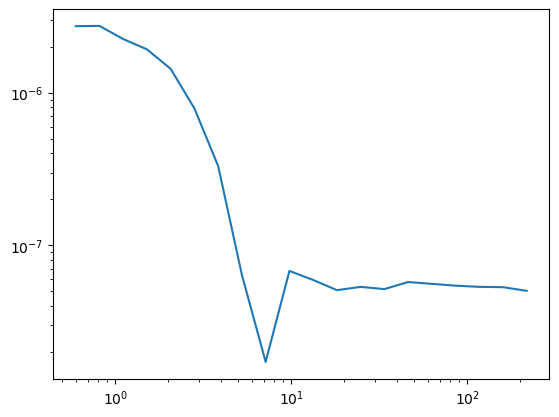

In [14]:
mplot.loglog(corr.meanr, corr.xip)

In [15]:
#rho 2 CC
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1'], g2=data['e2'], ra_units="deg", dec_units="deg")

corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.59563868   0.81259341   1.1086517    1.51272069   2.06399727
   2.81606181   3.84231785   5.24234135   7.15269267   9.76343815
  13.31552423  18.17278161  24.78687654  33.81952214  46.13782524
  62.93466188  85.83729161 117.08588566 159.65910437 217.6970272 ]
[1.52032234e-06 1.61022776e-06 1.16218009e-06 1.09605162e-06
 8.46461580e-07 3.32374834e-07 1.73873197e-07 2.19898958e-07
 3.08499975e-07 4.35250567e-07 4.58324106e-07 5.28594490e-07
 5.88984471e-07 5.78348527e-07 5.71526163e-07 6.44869959e-07
 6.78935951e-07 7.05726517e-07 7.08580093e-07 7.07051800e-07]
[1.44621975e-07 1.06432460e-07 7.84709544e-08 5.78045068e-08
 4.25347070e-08 3.12932870e-08 2.30259393e-08 1.69496180e-08
 1.24766437e-08 9.15025196e-09 6.72824039e-09 4.94946196e-09
 3.64176609e-09 2.68170753e-09 1.98077659e-09 1.47037691e-09
 1.09870755e-09 8.26586208e-10 6.27980113e-10 4.83476128e-10]


(1e-09, 1e-05)

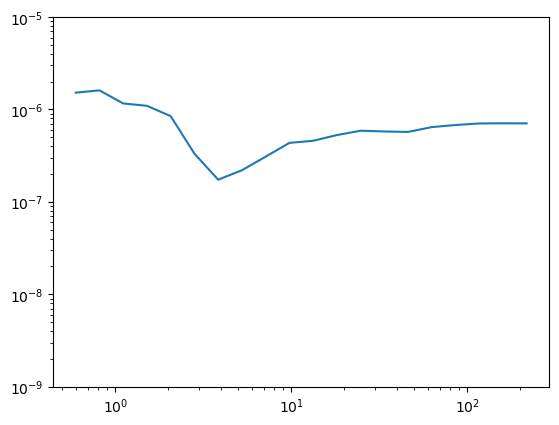

In [17]:
mplot.loglog(corr.meanr, corr.xip)
mplot.ylim(1e-9, 1e-5)

In [18]:
#rho 2 CC mean subtraction
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1']-np.mean(data['e1']), g2=data['e2']-np.mean(data['e2']), ra_units="deg", dec_units="deg")

corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.59549652   0.81242703   1.10841995   1.51246004   2.06375658
   2.81594173   3.84241845   5.24269856   7.15333031   9.76440525
  13.31683957  18.17477326  24.78972197  33.8238866   46.14484866
  62.9444865   85.8530983  117.10934247 159.69159517 217.74483827]
[ 6.20639323e-07  6.54472689e-07  3.07500153e-07  1.58611030e-07
 -9.88550939e-08 -6.30463786e-07 -7.99627802e-07 -7.84048263e-07
 -7.03696801e-07 -5.79842040e-07 -5.40126176e-07 -4.88188585e-07
 -4.34419147e-07 -4.45014493e-07 -4.61155601e-07 -4.12800565e-07
 -3.97752260e-07 -3.87601375e-07 -3.90913446e-07 -3.91821958e-07]
[1.40812920e-07 1.03648683e-07 7.64181823e-08 5.62868698e-08
 4.14166674e-08 3.04675173e-08 2.24176993e-08 1.65016446e-08
 1.21466968e-08 8.90817340e-09 6.55024319e-09 4.81841499e-09
 3.54531934e-09 2.61062660e-09 1.92820794e-09 1.43136925e-09
 1.06951921e-09 8.04616543e-10 6.11312336e-10 4.70619776e-10]


(1e-09, 1e-05)

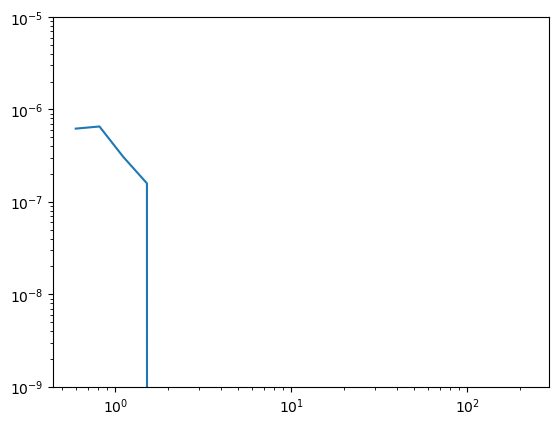

In [19]:
mplot.loglog(corr.meanr, corr.xip)

In [25]:
#rho 2 CC mean flip e1 model vs. e1 star
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0, sep_units="arcmin", bin_slop=0.01)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1_model']-data['de1'], g2=data['e2_model']-data['de2'], ra_units="deg", dec_units="deg")

corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.59563868   0.81259341   1.1086517    1.51272069   2.06399727
   2.81606181   3.84231785   5.24234135   7.15269267   9.76343815
  13.31552423  18.17278161  24.78687654  33.81952214  46.13782524
  62.93466188  85.83729161 117.08588566 159.65910437 217.6970272 ]
[-3.92895084e-06 -3.86285012e-06 -3.32475246e-06 -2.74665295e-06
 -2.01665963e-06 -1.24424863e-06 -4.87810649e-07  9.17660549e-08
  2.73936052e-07  2.99065291e-07  3.39496602e-07  4.26682190e-07
  4.81943395e-07  4.74811963e-07  4.56352562e-07  5.32807695e-07
  5.69919072e-07  5.98631339e-07  6.01991629e-07  6.06177716e-07]
[1.49868673e-07 1.10293692e-07 8.13177790e-08 5.99015794e-08
 4.40778110e-08 3.24285669e-08 2.38612906e-08 1.75645282e-08
 1.29292802e-08 9.48221125e-09 6.97233223e-09 5.12902203e-09
 3.77388465e-09 2.77899640e-09 2.05263660e-09 1.52372028e-09
 1.13856724e-09 8.56573685e-10 6.50762418e-10 5.01016016e-10]


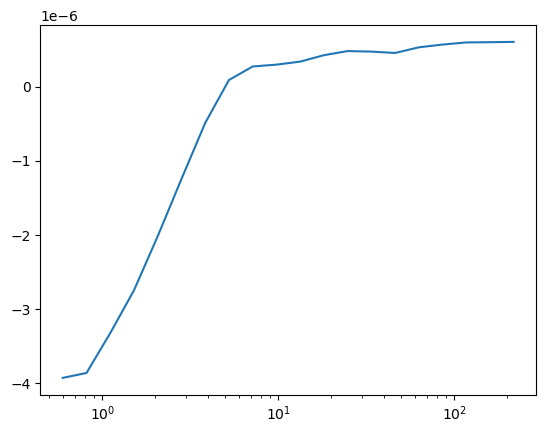

In [26]:
mplot.semilogx(corr.meanr, corr.xip)

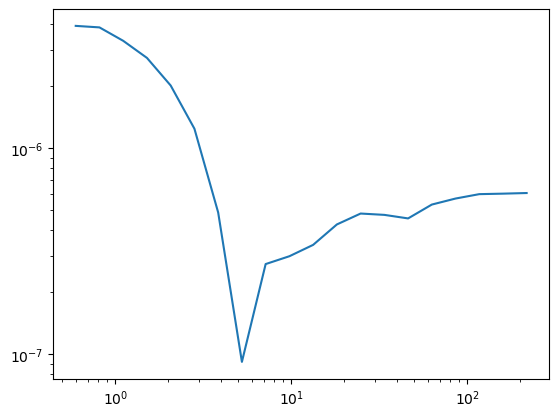

In [28]:
mplot.loglog(corr.meanr, np.abs(corr.xip))

In [ ]:

#rho 2
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0)
cat1 = treecorr.Catalog(ra=data_used['ra'], dec=data_used['dec'], g1=data_used['e1'], g2=data_used['e2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data_used['ra'], dec=data_used['dec'], g1=data_used['de1'], g2=data_used['de2'], ra_units="deg", dec_units="deg")
corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)